In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('customer_segmentation.csv')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.shape

(2240, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [11]:
data['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [12]:
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [13]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst = True)

In [14]:
data['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


In [15]:
data['Age'] = 2025 - data['Year_Birth']

In [16]:
data['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [17]:
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

In [18]:
data['Total_Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [19]:
spend_cols = [ 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds'
]

In [20]:
data['Total_Spending'] = data[spend_cols].sum(axis = 1)

In [21]:
data[['Total_Spending']]

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


In [22]:
data['Customer_Since'] = (pd.Timestamp("today") - data['Dt_Customer']).dt.days

In [23]:
data['Customer_Since']

0       4705
1       4155
2       4354
3       4181
4       4203
        ... 
2235    4423
2236    4061
2237    4197
2238    4198
2239    4664
Name: Customer_Since, Length: 2216, dtype: int64

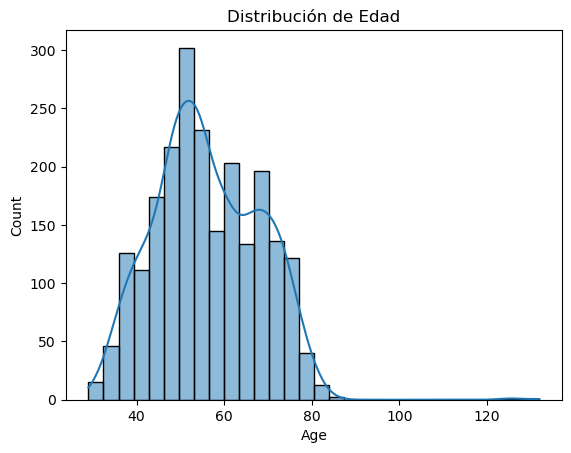

In [24]:
sns.histplot(data['Age'], bins= 30, kde=True)
plt.title('Distribución de Edad')
plt.show()

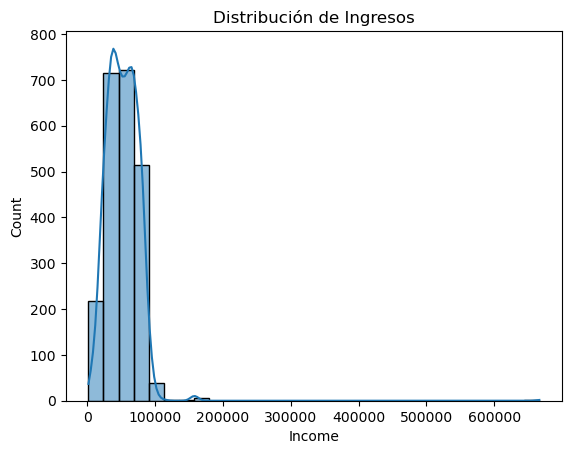

In [25]:
sns.histplot(data['Income'], bins= 30, kde=True)
plt.title('Distribución de Ingresos')
plt.show()

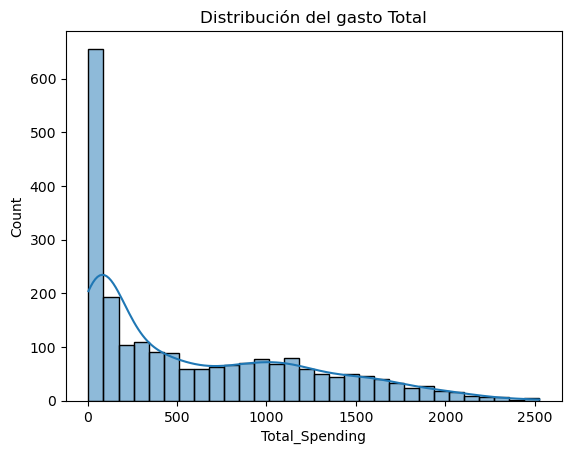

In [26]:
sns.histplot(data['Total_Spending'], bins= 30, kde=True)
plt.title('Distribución del gasto Total')
plt.show()

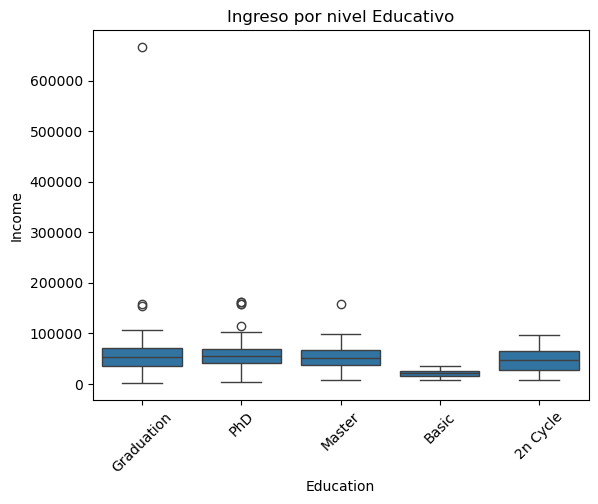

In [27]:
sns.boxplot(x= 'Education', y = 'Income', data = data)
plt.xticks(rotation = 45)
plt.title('Ingreso por nivel Educativo')
plt.show()

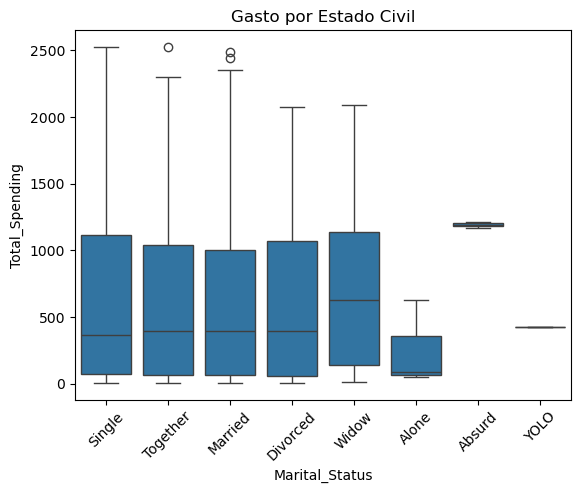

In [28]:
sns.boxplot(x = 'Marital_Status', y = 'Total_Spending', data = data)
plt.xticks(rotation = 45)
plt.title('Gasto por Estado Civil')
plt.show()

In [29]:
corr = data[['Income', 'Age', 'Recency', 'Total_Spending', 'NumWebPurchases', 'NumStorePurchases']].corr()

In [30]:
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


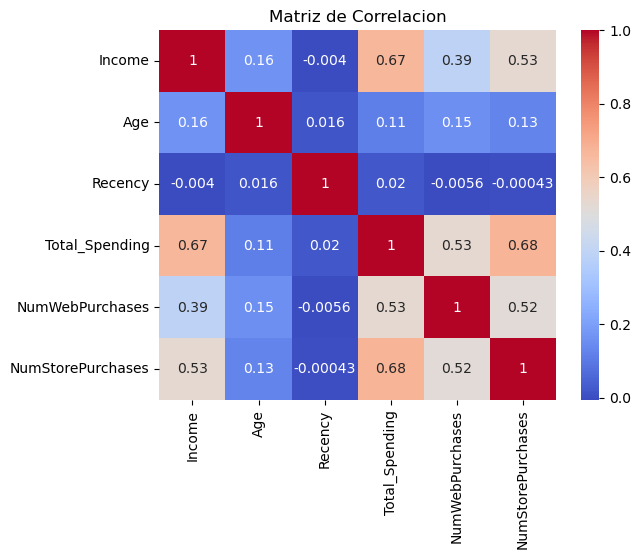

In [31]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title('Matriz de Correlacion')
plt.show()

In [32]:
pivot_income = data.pivot_table(values = 'Income', index = 'Education', columns= 'Marital_Status', aggfunc= 'mean')

In [33]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


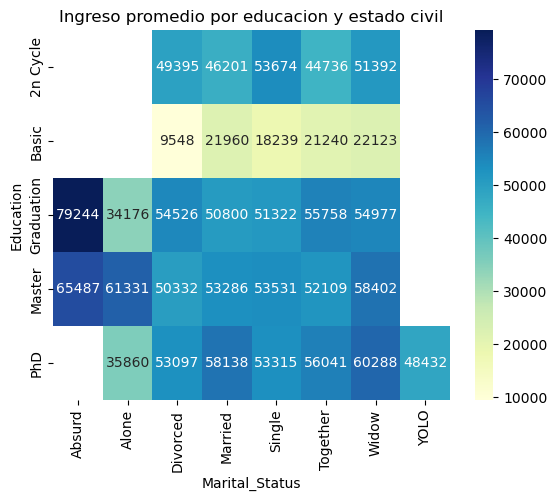

In [34]:
sns.heatmap(pivot_income, annot=True, fmt= '.0f', cmap= 'YlGnBu')
plt.title('Ingreso promedio por educacion y estado civil')
plt.show()

In [35]:
group_1 = data.groupby('Education')['Total_Spending'].mean().sort_values(ascending= False)

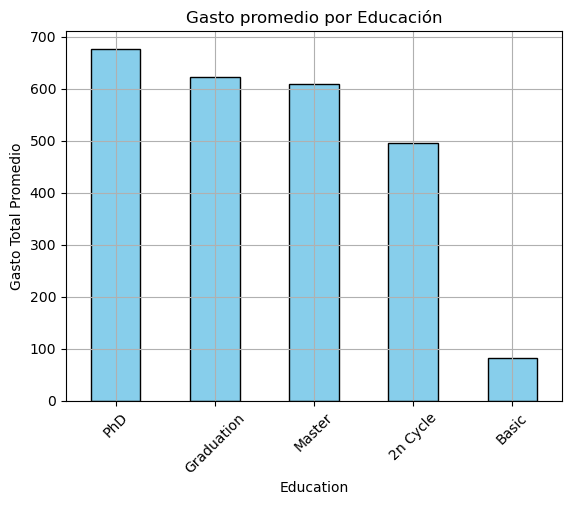

In [42]:
group_1.plot(kind='bar', color = 'skyblue', edgecolor = 'black')
plt.title('Gasto promedio por Educación')
plt.ylabel('Gasto Total Promedio')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [52]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny'],
      dtype='object')

In [53]:
data['AcceptedAny'] = data[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', ]].sum(axis=1)

In [54]:
data['AcceptedAny'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [55]:
data['AcceptedAny'] = data['AcceptedAny'].apply(lambda x: 1 if x > 0 else 0)

In [56]:
data['AcceptedAny'].unique()

array([0, 1], dtype=int64)

In [57]:
gropu_2 = data.groupby('Marital_Status')['AcceptedAny'].mean().sort_values(ascending=False)

In [58]:
gropu_2

Marital_Status
Absurd      0.500000
Alone       0.333333
Widow       0.236842
Married     0.211202
Single      0.205945
Together    0.200698
Divorced    0.198276
YOLO        0.000000
Name: AcceptedAny, dtype: float64

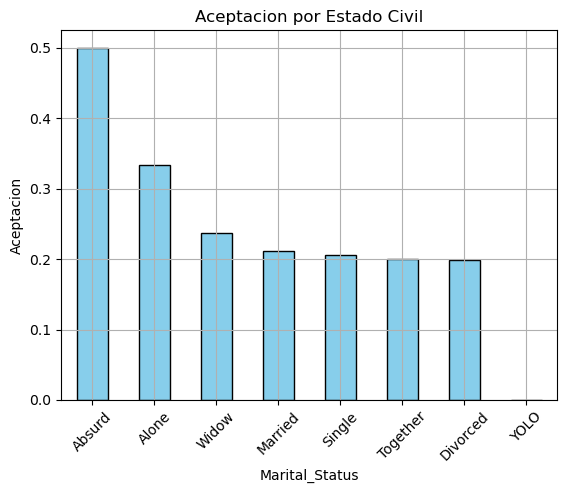

In [60]:
gropu_2.plot(kind='bar', color = 'skyblue', edgecolor = 'black')
plt.title('Aceptacion por Estado Civil')
plt.ylabel('Aceptacion')
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [61]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [62]:
lables = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [63]:
data['AgeGroup'] = pd.cut(data['Age'], bins = bins, labels= lables)

In [64]:
group_3 = data.groupby('AgeGroup')['Income'].mean()

C:\Users\pauli\AppData\Local\Temp\ipykernel_23924\1566304135.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_3 = data.groupby('AgeGroup')['Income'].mean()


In [65]:
group_3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

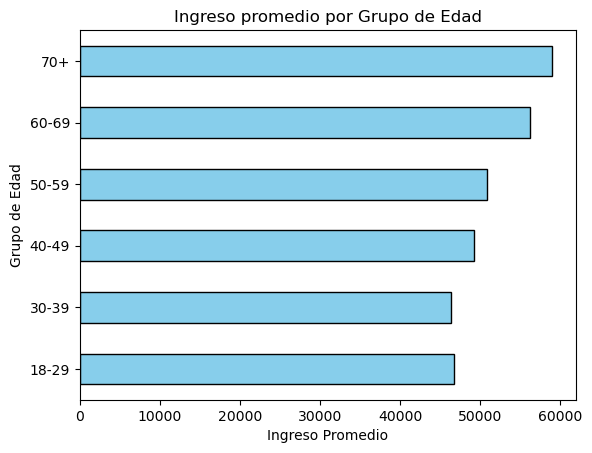

In [68]:
group_3.plot(kind='barh', color = 'skyblue', edgecolor = 'black')
plt.title('Ingreso promedio por Grupo de Edad')
plt.ylabel('Grupo de Edad')
plt.xlabel('Ingreso Promedio')
plt.show()

In [69]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'AgeGroup'],
      dtype='object')

In [70]:
features = ["Age", "Income", "Total_Spending", "NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Recency"]

In [71]:
X = data[features].copy()

In [72]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [74]:
X_scaled = scaler.fit_transform(X)

In [75]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [76]:
from sklearn.cluster import KMeans

In [77]:
wcss = []

In [78]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

d:\Descargas\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

In [79]:
wcss

[10218.620143748782,
 9007.786818672805,
 8158.811687813969,
 7567.280816376972,
 7102.727012319414,
 6573.5067959079115,
 6156.907190774638,
 5874.127883297782]

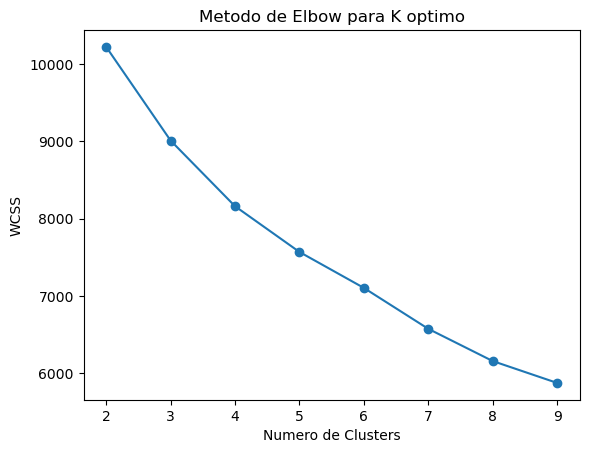

In [80]:
plt.plot(range(2,10), wcss, marker = 'o')
plt.title('Metodo de Elbow para K optimo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
kmeans = KMeans(n_clusters = 6)
data['Cluster'] = kmeans.fit_predict(X_scaled)

d:\Descargas\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Descargas\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [82]:
data['Cluster']

0       4
1       0
2       4
3       2
4       5
       ..
2235    4
2236    4
2237    3
2238    1
2239    0
Name: Cluster, Length: 2216, dtype: int32

In [83]:
cluster_summary = data.groupby('Cluster')[features].mean()

In [84]:
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,68.062305,43430.062305,172.623053,2.613707,4.028037,5.392523,52.052960
1,69.318182,73497.366667,1200.709091,4.648485,8.548485,2.754545,51.242424
2,48.731544,32986.908277,116.337808,2.183445,3.275168,6.644295,23.973154
3,46.118902,78234.225610,1296.472561,4.579268,8.533537,2.661585,50.353659
4,58.832134,59971.750600,895.664269,8.004796,7.894484,6.390887,46.112710
5,49.136729,32628.777480,115.000000,2.316354,3.179625,7.075067,76.493298


In [85]:
data['Cluster'].value_counts()

Cluster
2    447
4    417
5    373
1    330
3    328
0    321
Name: count, dtype: int64

In [86]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca_data = pca.fit_transform(X_scaled)
data['PCA1'], data['PCA2'] = pca_data[:, 0], pca_data[:,1]

In [88]:
pca_data

array([[ 1.1075188 ,  0.21175951],
       [-1.33673385, -0.269839  ],
       [ 1.88227676,  1.01416098],
       ...,
       [ 1.1535966 , -1.15056999],
       [ 1.88768024,  1.16073698],
       [-0.84182091,  0.15963623]])

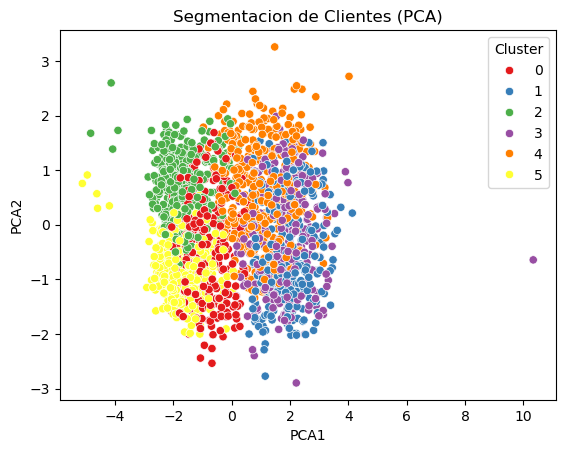

In [91]:
sns.scatterplot(x= 'PCA1', y= 'PCA2', hue = 'Cluster', data = data, palette= 'Set1')
plt.title('Segmentacion de Clientes (PCA)')
plt.show()

In [92]:
cluster_summary.to_csv('Resumenes de Clusters.csv')